In [1]:
import cellpose
import torch 
import torchvision
import zarr
import numpy as np
import scipy as sp
import squidpy as sq
import numpy as np

In [2]:
from glob import glob
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

>>> GPU activated? YES


In [3]:
## load new image

In [4]:
ls

Cell and Nuclei Segmentation.ipynb  slurm-26827221.out
dask-worker-space/                  slurm-26827222.out
make anndata.ipynb                  slurm-26827223.out
Mean_Intensity_Calculation.ipynb    slurm-26827224.out
__pycache__/                        slurm-26827225.out
slurm-26746641.out                  slurm-26827226.out
slurm-26746642.out                  slurm-26836600.out
slurm-26827163.out                  slurm-26836601.out
slurm-26827164.out                  slurm-26836650.out
slurm-26827209.out                  slurm-26836651.out
slurm-26827210.out                  slurm-26836727.out
slurm-26827211.out                  slurm-26836728.out
slurm-26827212.out                  slurm-26836844.out
slurm-26827213.out                  slurm-26836845.out
slurm-26827214.out                  slurm-26836895.out
slurm-26827215.out                  slurm-26836896.out
slurm-26827216.out                  Spatial Neighborhood.ipynb
slurm-26827217.out                  Starfish test.ipynb
s

In [5]:
cd /gpfs/commons/groups/nygcfaculty/PySeq/20210323_4i4color/pipeline/seg_images

/gpfs/commons/groups/nygcfaculty/PySeq/20210323_4i4color/pipeline/seg_images


In [6]:
# model_type='cyto' or 'nuclei' or 'cyto2'
# start logger (to see training across epochs)
logger = io.logger_setup()
model = models.CellposeModel(gpu=use_GPU,model_type='TN2')

2022-09-18 02:45:20,421 [INFO] WRITING LOG OUTPUT TO /gpfs/commons/home/jsingh/.cellpose/run.log
2022-09-18 02:45:20,426 [INFO] >> TN2 << model set to be used
2022-09-18 02:45:20,429 [INFO] ** TORCH CUDA version installed and working. **
2022-09-18 02:45:20,430 [INFO] >>>> using GPU
2022-09-18 02:45:20,771 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [7]:
import skimage
cell_image = skimage.io.imread('/gpfs/commons/groups/nygcfaculty/PySeq/20210323_4i4color/pipeline/seg_images/m1a_cell.tiff')
nuclei_image = skimage.io.imread('/gpfs/commons/groups/nygcfaculty/PySeq/20210323_4i4color/pipeline/seg_images/m1a_nuclei.tiff')


In [8]:
import matplotlib.pyplot as plt

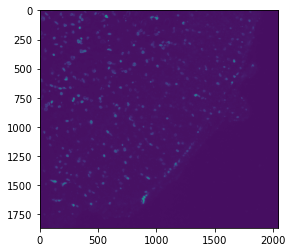

In [9]:
plt.imshow(nuclei_image)

In [10]:
## test cellpose on cell_image
channels = [0,0]
masks, flows, styles = model.eval(cell_image, diameter=None, channels=channels, cellprob_threshold= -6, flow_threshold= 1000)

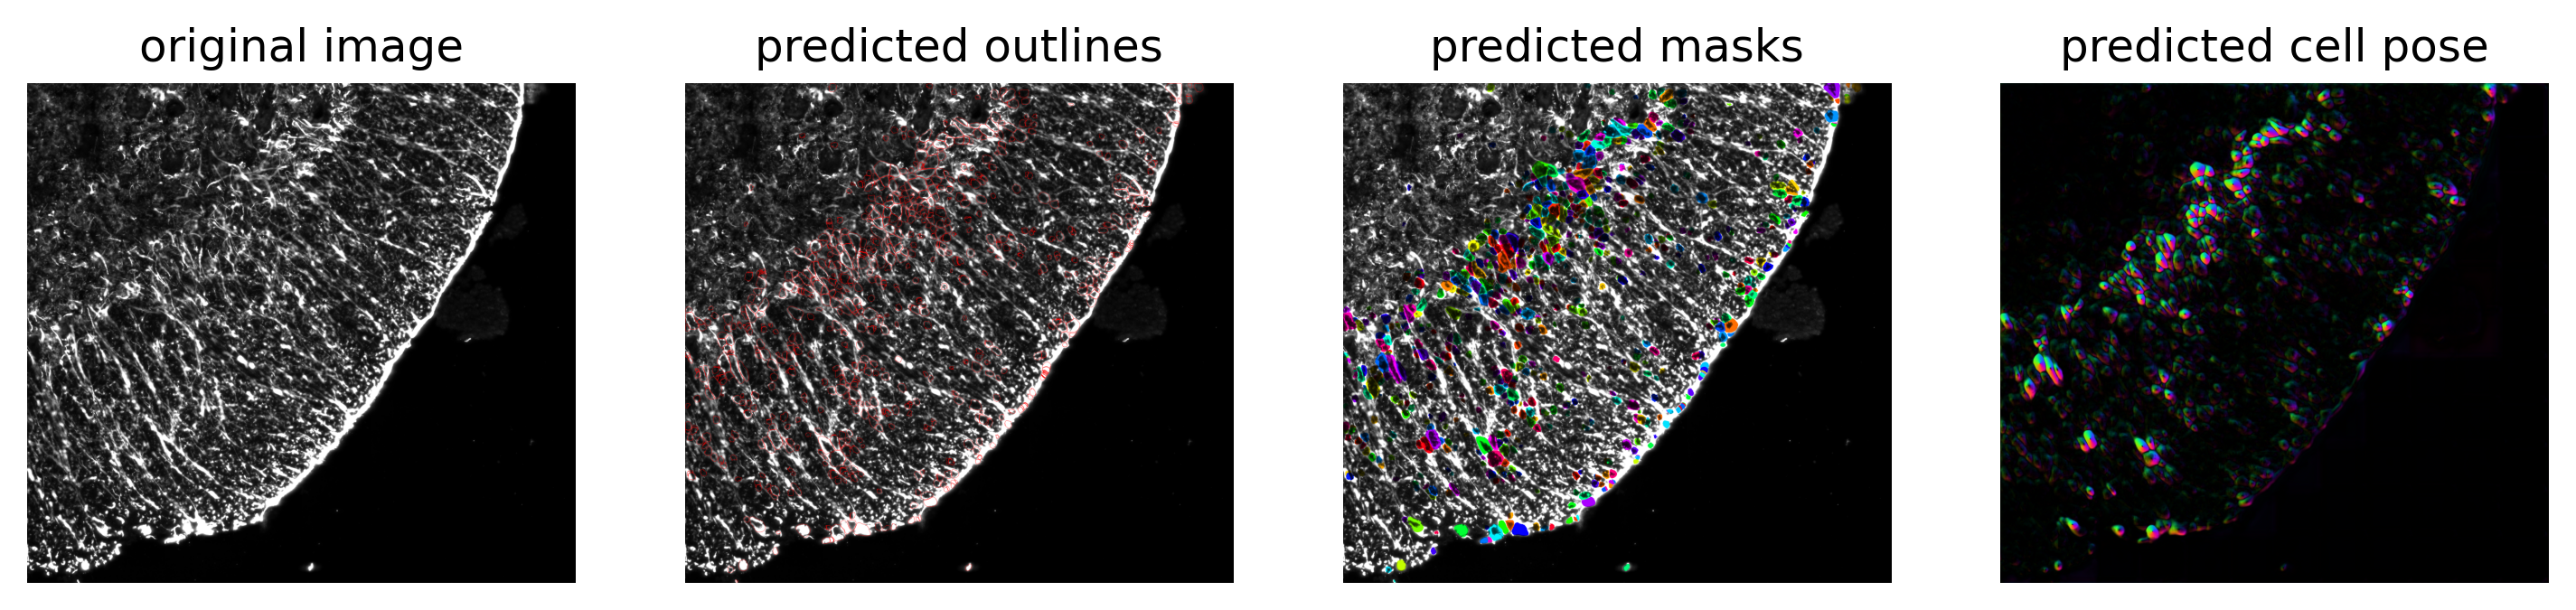

In [11]:
from cellpose import plot
fig = plt.figure(figsize=(12,5), dpi = 300)
plot.show_segmentation(fig, cell_image, masks, flows[0], channels= channels,  file_name = 'test_cell.tiff')

In [12]:
np.max(masks)

806

2022-09-18 02:45:39,667 [INFO] >> TN2 << model set to be used
2022-09-18 02:45:39,669 [INFO] ** TORCH CUDA version installed and working. **
2022-09-18 02:45:39,670 [INFO] >>>> using GPU
2022-09-18 02:45:39,812 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


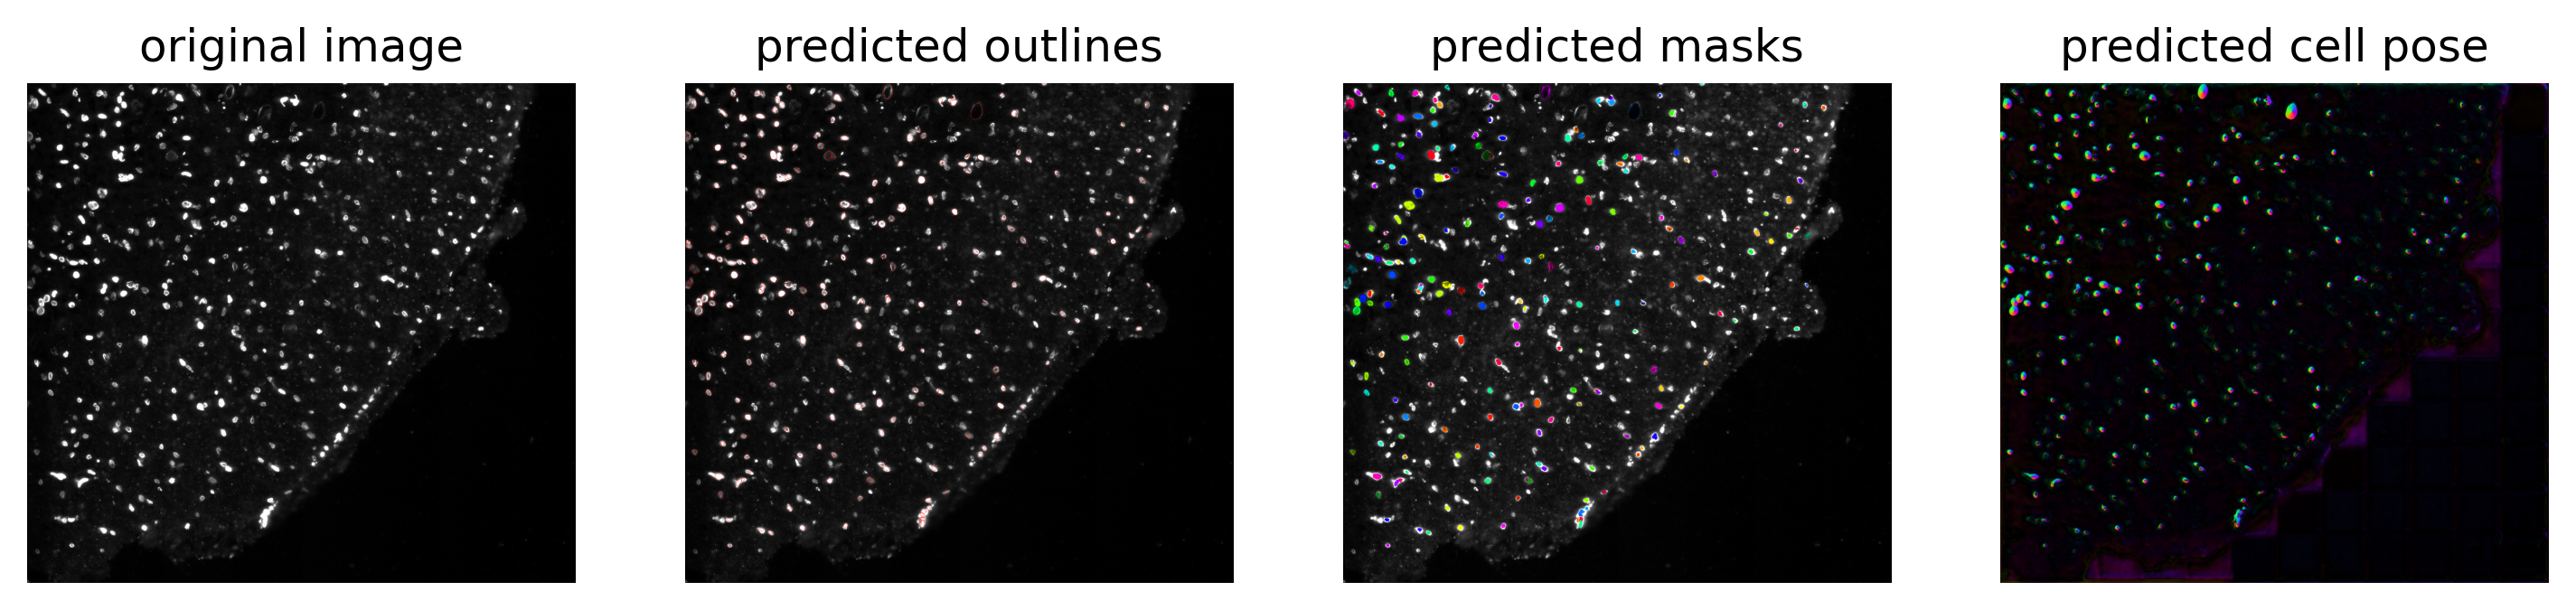

In [13]:
####### On nuclei image 
channels = [0,0]
model = models.CellposeModel(gpu=use_GPU,model_type='TN2')
masks, flows, styles = model.eval(nuclei_image, diameter=None, channels=channels, cellprob_threshold= -6, flow_threshold= 1000)
fig = plt.figure(figsize=(12,5), dpi = 300)
plot.show_segmentation(fig, nuclei_image, masks, flows[0], channels= channels,  file_name = 'test_cell.tiff')




In [14]:
np.max(masks)

217

2022-09-18 03:04:46,325 [INFO] >> nucleitorch_0 << model set to be used
2022-09-18 03:04:46,329 [INFO] ** TORCH CUDA version installed and working. **
2022-09-18 03:04:46,330 [INFO] >>>> using GPU
2022-09-18 03:04:46,710 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2022-09-18 03:04:46,711 [INFO] >>>> model diam_labels =  30.000 (mean diameter of training ROIs)


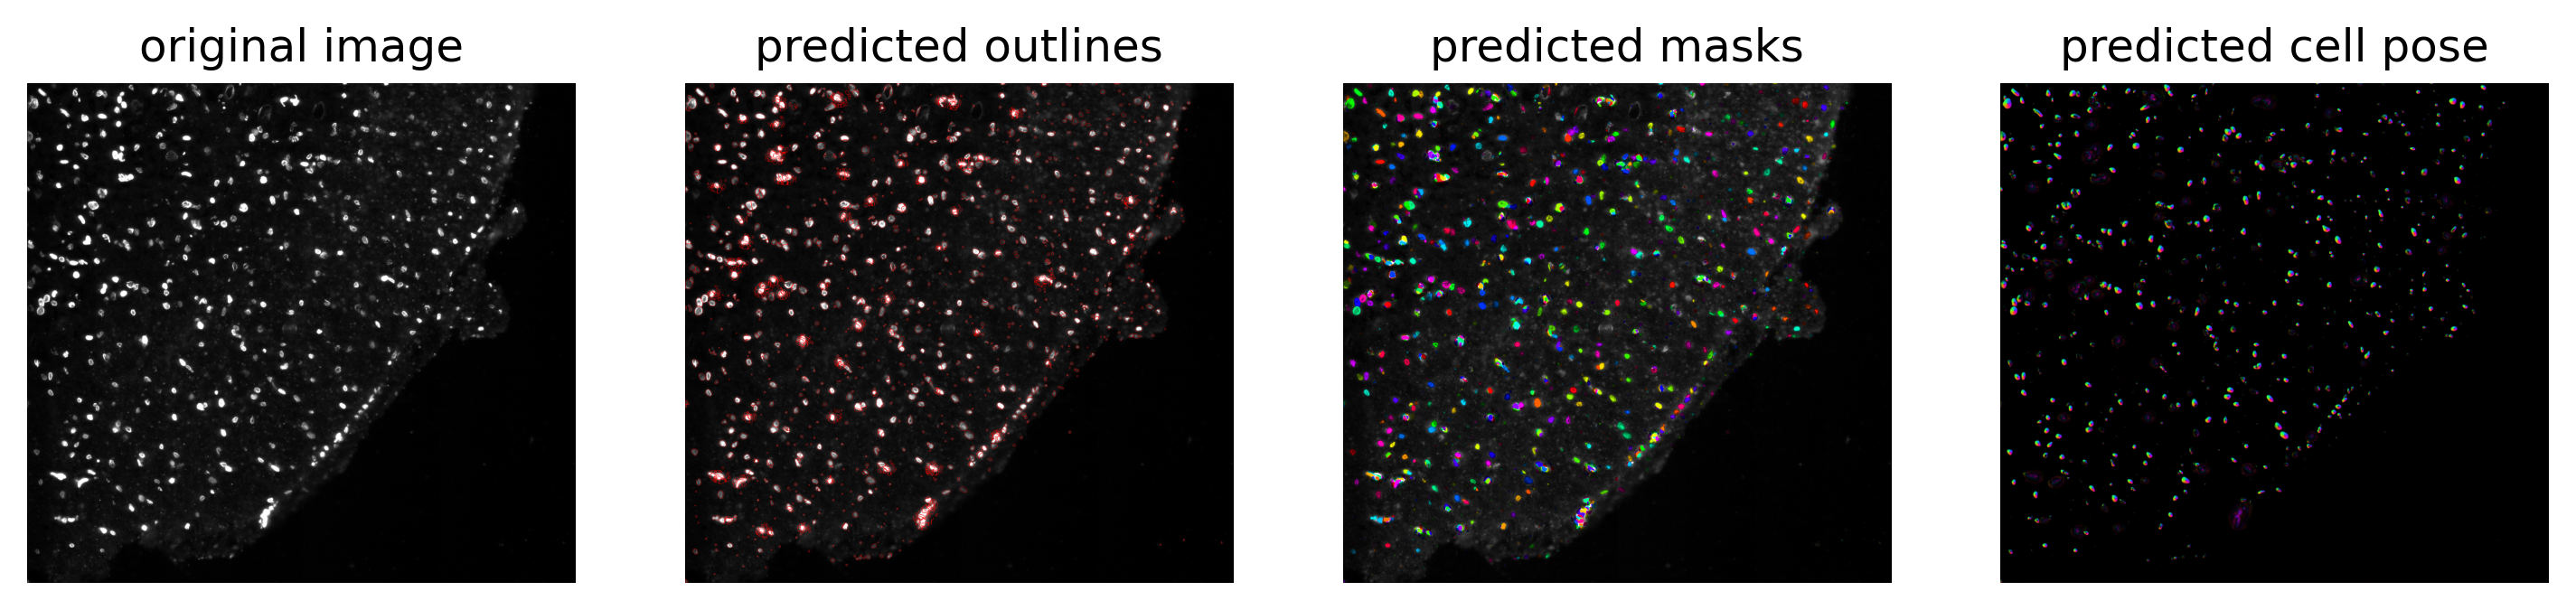

In [50]:
############ Different Segmentation Algorithm ########
####### On nuclei image 
channels = [0,0]
model = models.CellposeModel(gpu=use_GPU,model_type='nucleitorch_0')
masks, flows, styles = model.eval(nuclei_image, diameter=None, channels=channels, cellprob_threshold= -6, flow_threshold= 1000)
fig = plt.figure(figsize=(12,5), dpi = 300)
plot.show_segmentation(fig, nuclei_image, masks, flows[0], channels= channels,  file_name = '/gpfs/commons/home/jsingh/hudson_notebooks/nuc')

In [16]:
np.max(masks)

1767

In [35]:
show_segmentation(fig, nuclei_image, masks, flows[0], channels= channels,  file_name = 'nuclei')

In [48]:
save_path = os.path.splitext('/gpfs/commons/home/jsingh/hudson_notebooks/nuc')[0]

In [49]:
save_path

'/gpfs/commons/home/jsingh/hudson_notebooks/nuc'

In [24]:
plot.show_segmentation(fig, nuclei_image, masks, flows[0], channels= channels,  file_name = '~/test_cell.tiff')

In [52]:
img0 = nuclei_image
if img0.shape[0] < 4:
    img0 = np.transpose(img0, (1,2,0))
if img0.shape[-1] < 3 or img0.ndim < 3:
    img0 = image_to_rgb(img0, channels=channels)
else:
    if img0.max()<=50.0:
        img0 = np.uint8(np.clip(img0*255, 0, 1))

io.imsave('/gpfs/commons/home/jsingh/hudson_notebooks/nuc.jpg', img0)

2022-09-14 09:49:41,858 [INFO] >> cytotorch_0 << model set to be used
2022-09-14 09:49:41,860 [INFO] ** TORCH CUDA version installed and working. **
2022-09-14 09:49:41,861 [INFO] >>>> using GPU
2022-09-14 09:49:42,279 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2022-09-14 09:49:42,281 [INFO] >>>> model diam_labels =  30.000 (mean diameter of training ROIs)


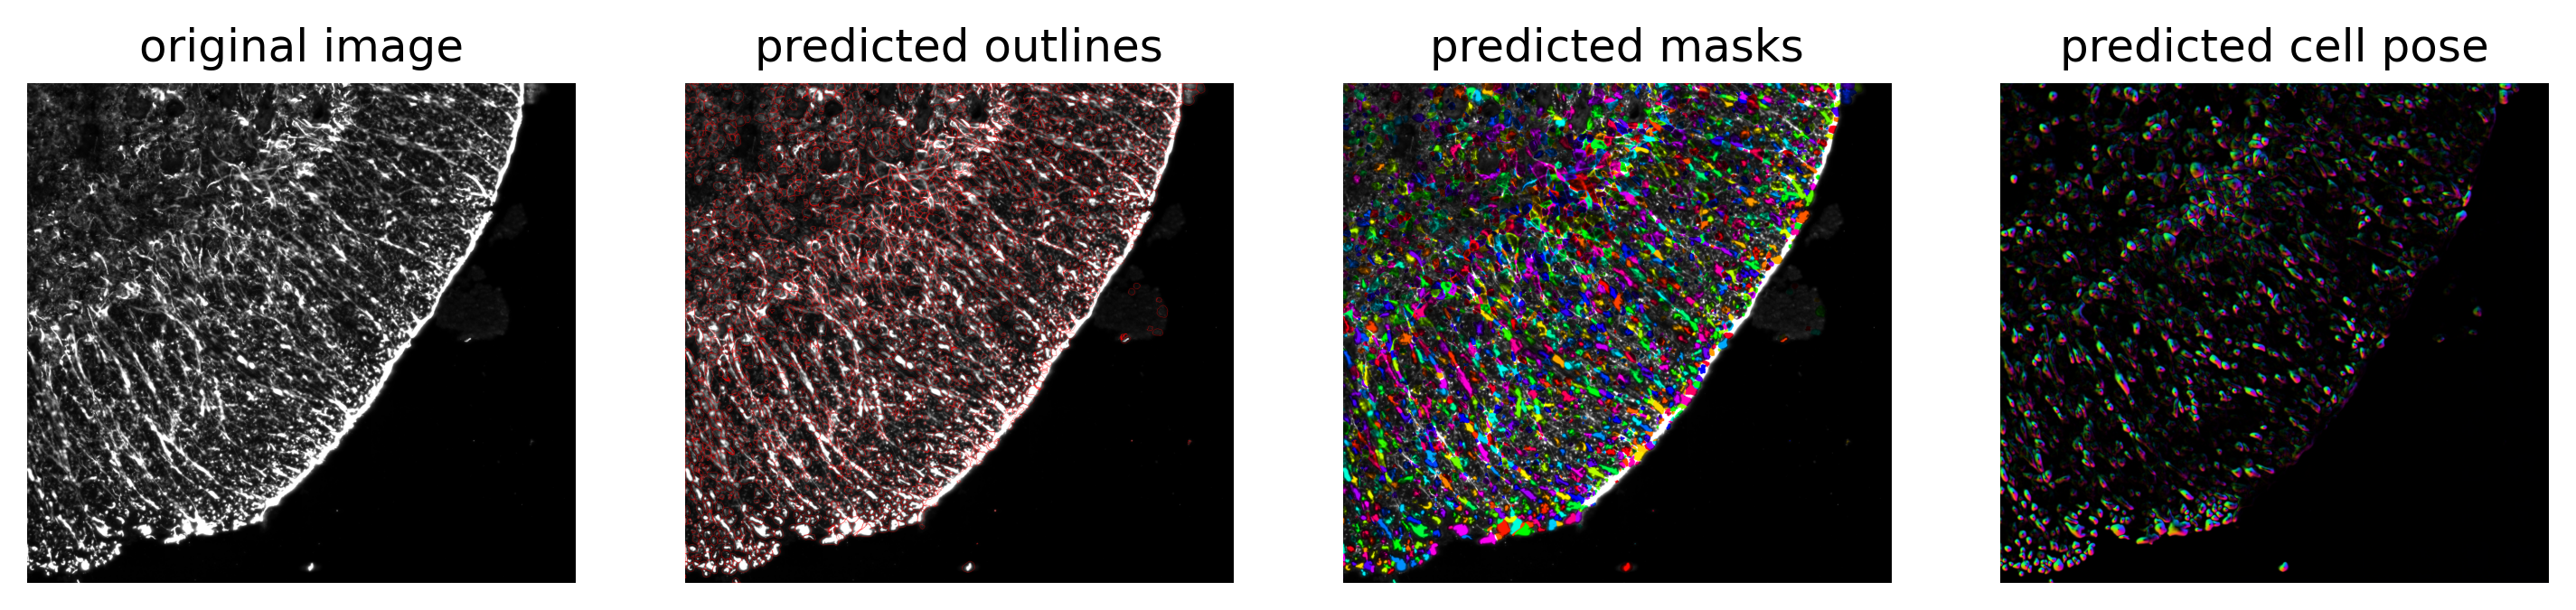

In [17]:
### on cell image
channels = [0,0]
model = models.CellposeModel(gpu=use_GPU,model_type='cytotorch_0')
masks, flows, styles = model.eval(cell_image, diameter=None, channels=channels, cellprob_threshold= -6, flow_threshold= 1000)
fig = plt.figure(figsize=(12,5), dpi = 300)
plot.show_segmentation(fig, cell_image, masks, flows[0], channels= channels,  file_name = 'test_cell.tiff')

In [18]:
np.max(masks)

3496

In [64]:
cell_masks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [65]:
nuclei_masks

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0, 1767, 1767, ...,    0,    0,    0],
       [   0, 1767, 1767, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

In [34]:
import os
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from cellpose import utils, io, transforms

try:
    import matplotlib
    MATPLOTLIB_ENABLED = True 
except:
    MATPLOTLIB_ENABLED = False

try:
    from skimage import color
    from skimage.segmentation import find_boundaries
    SKIMAGE_ENABLED = True 
except:
    SKIMAGE_ENABLED = False

# modified to use sinebow color
def dx_to_circ(dP,transparency=False,mask=None):
    """ dP is 2 x Y x X => 'optic' flow representation 
    
    Parameters
    -------------
    
    dP: 2xLyxLx array
        Flow field components [dy,dx]
        
    transparency: bool, default False
        magnitude of flow controls opacity, not lightness (clear background)
        
    mask: 2D array 
        Multiplies each RGB component to suppress noise
    
    """
    
    dP = np.array(dP)
    mag = np.clip(transforms.normalize99(np.sqrt(np.sum(dP**2,axis=0))), 0, 1.)
    angles = np.arctan2(dP[1], dP[0])+np.pi
    a = 2
    r = ((np.cos(angles)+1)/a)
    g = ((np.cos(angles+2*np.pi/3)+1)/a)
    b =((np.cos(angles+4*np.pi/3)+1)/a)
    
    if transparency:
        im = np.stack((r,g,b,mag),axis=-1)
    else:
        im = np.stack((r*mag,g*mag,b*mag),axis=-1)
        
    if mask is not None and transparency and dP.shape[0]<3:
        im[:,:,-1] *= mask
        
    im = (np.clip(im, 0, 1) * 255).astype(np.uint8)
    return im


def show_segmentation(fig, img, maski, flowi, channels=[0,0], file_name=None):
    """ plot segmentation results (like on website)
    
    Can save each panel of figure with file_name option. Use channels option if
    img input is not an RGB image with 3 channels.
    
    Parameters
    -------------

    fig: matplotlib.pyplot.figure
        figure in which to make plot

    img: 2D or 3D array
        image input into cellpose

    maski: int, 2D array
        for image k, masks[k] output from Cellpose.eval, where 0=NO masks; 1,2,...=mask labels

    flowi: int, 2D array 
        for image k, flows[k][0] output from Cellpose.eval (RGB of flows)

    channels: list of int (optional, default [0,0])
        channels used to run Cellpose, no need to use if image is RGB

    file_name: str (optional, default None)
        file name of image, if file_name is not None, figure panels are saved
        
    seg_norm: bool (optional, default False)
        improve cell visibility under labels
        

    """
    if not MATPLOTLIB_ENABLED:
        raise ImportError("matplotlib not installed, install with 'pip install matplotlib'")
    ax = fig.add_subplot(1,4,1)
    img0 = img.copy()

    if img0.shape[0] < 4:
        img0 = np.transpose(img0, (1,2,0))
    if img0.shape[-1] < 3 or img0.ndim < 3:
        img0 = image_to_rgb(img0, channels=channels)
    else:
        if img0.max()<=50.0:
            img0 = np.uint8(np.clip(img0*255, 0, 1))
    ax.imshow(img0)
    ax.set_title('original image')
    ax.axis('off')

    outlines = utils.masks_to_outlines(maski)

    overlay = mask_overlay(img0, maski)

    ax = fig.add_subplot(1,4,2)
    outX, outY = np.nonzero(outlines)
    imgout= img0.copy()
    imgout[outX, outY] = np.array([255,0,0]) # pure red

    ax.imshow(imgout)
    ax.set_title('predicted outlines')
    ax.axis('off')

    ax = fig.add_subplot(1,4,3)
    ax.imshow(overlay)
    ax.set_title('predicted masks')
    ax.axis('off')

    ax = fig.add_subplot(1,4,4)
    ax.imshow(flowi)
    ax.set_title('predicted cell pose')
    ax.axis('off')

    if file_name is not None:
        save_path = os.path.splitext(file_name)[0]
        io.imsave(save_path + '_overlay.jpg', overlay)
        io.imsave(save_path + '_outlines.jpg', imgout)
        io.imsave(save_path + '_flows.jpg', flowi)


def mask_rgb(masks, colors=None):
    """ masks in random rgb colors

    Parameters
    ----------------

    masks: int, 2D array
        masks where 0=NO masks; 1,2,...=mask labels

    colors: int, 2D array (optional, default None)
        size [nmasks x 3], each entry is a color in 0-255 range

    Returns
    ----------------

    RGB: uint8, 3D array
        array of masks overlaid on grayscale image

    """
    if colors is not None:
        if colors.max()>1:
            colors = np.float32(colors)
            colors /= 255
        colors = utils.rgb_to_hsv(colors)
    
    HSV = np.zeros((masks.shape[0], masks.shape[1], 3), np.float32)
    HSV[:,:,2] = 1.0
    for n in range(int(masks.max())):
        ipix = (masks==n+1).nonzero()
        if colors is None:
            HSV[ipix[0],ipix[1],0] = np.random.rand()
        else:
            HSV[ipix[0],ipix[1],0] = colors[n,0]
        HSV[ipix[0],ipix[1],1] = np.random.rand()*0.5+0.5
        HSV[ipix[0],ipix[1],2] = np.random.rand()*0.5+0.5
    RGB = (utils.hsv_to_rgb(HSV) * 255).astype(np.uint8)
    return RGB


def mask_overlay(img, masks, colors=None):
    """ overlay masks on image (set image to grayscale)

    Parameters
    ----------------

    img: int or float, 2D or 3D array
        img is of size [Ly x Lx (x nchan)]

    masks: int, 2D array
        masks where 0=NO masks; 1,2,...=mask labels

    colors: int, 2D array (optional, default None)
        size [nmasks x 3], each entry is a color in 0-255 range

    Returns
    ----------------

    RGB: uint8, 3D array
        array of masks overlaid on grayscale image

    """
    if colors is not None:
        if colors.max()>1:
            colors = np.float32(colors)
            colors /= 255
        colors = utils.rgb_to_hsv(colors)
    if img.ndim>2:
        img = img.astype(np.float32).mean(axis=-1)
    else:
        img = img.astype(np.float32)
    
    HSV = np.zeros((img.shape[0], img.shape[1], 3), np.float32)
    HSV[:,:,2] = np.clip((img / 255. if img.max() > 1 else img) * 1.5, 0, 1)
    hues = np.linspace(0, 1, masks.max()+1)[np.random.permutation(masks.max())]
    for n in range(int(masks.max())):
        ipix = (masks==n+1).nonzero()
        if colors is None:
            HSV[ipix[0],ipix[1],0] = hues[n]
        else:
            HSV[ipix[0],ipix[1],0] = colors[n,0]
        HSV[ipix[0],ipix[1],1] = 1.0
    RGB = (utils.hsv_to_rgb(HSV) * 255).astype(np.uint8)
    return RGB


def image_to_rgb(img0, channels=[0,0]):
    """ image is 2 x Ly x Lx or Ly x Lx x 2 - change to RGB Ly x Lx x 3 """
    img = img0.copy()
    img = img.astype(np.float32)
    if img.ndim<3:
        img = img[:,:,np.newaxis]
    if img.shape[0]<5:
        img = np.transpose(img, (1,2,0))
    if channels[0]==0:
        img = img.mean(axis=-1)[:,:,np.newaxis]
    for i in range(img.shape[-1]):
        if np.ptp(img[:,:,i])>0:
            img[:,:,i] = np.clip(transforms.normalize99(img[:,:,i]), 0, 1)
            img[:,:,i] = np.clip(img[:,:,i], 0, 1)
    img *= 255
    img = np.uint8(img)
    RGB = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
    if img.shape[-1]==1:
        RGB = np.tile(img,(1,1,3))
    else:
        RGB[:,:,channels[0]-1] = img[:,:,0]
        if channels[1] > 0:
            RGB[:,:,channels[1]-1] = img[:,:,1]
    return RGB


def interesting_patch(mask, bsize=130):
    """ get patch of size bsize x bsize with most masks """
    Ly,Lx = mask.shape
    m = np.float32(mask>0)
    m = gaussian_filter(m, bsize/2)
    y,x = np.unravel_index(np.argmax(m), m.shape)
    ycent = max(bsize//2, min(y, Ly-bsize//2))
    xcent = max(bsize//2, min(x, Lx-bsize//2))
    patch = [np.arange(ycent-bsize//2, ycent+bsize//2, 1, int),
             np.arange(xcent-bsize//2, xcent+bsize//2, 1, int)]
    return patch


def disk(med, r, Ly, Lx):
    """ returns pixels of disk with radius r and center med """
    yy, xx = np.meshgrid(np.arange(0,Ly,1,int), np.arange(0,Lx,1,int),
                         indexing='ij')
    inds = ((yy-med[0])**2 + (xx-med[1])**2)**0.5 <= r
    y = yy[inds].flatten()
    x = xx[inds].flatten()
    return y,x


def outline_view(img0,maski,color=[1,0,0], mode='inner'):
    """
    Generates a red outline overlay onto image. 
    """
#     img0 = utils.rescale(img0)
    if len(img0.shape)<3:
#         img0 = image_to_rgb(img0) broken, transposing some images...
        img0 = np.stack([img0]*3,axis=-1)
    
    if SKIMAGE_ENABLED:
        outlines = find_boundaries(maski,mode=mode) #not using masks_to_outlines as that gives border 'outlines'
    else:
        outlines = utils.masks_to_outlines(maski,mode=mode) #not using masks_to_outlines as that gives border 'outlines'
    outY, outX = np.nonzero(outlines)
    imgout = img0.copy()
#     imgout[outY, outX] = np.array([255,0,0]) #pure red
    imgout[outY, outX] = np.array(color)

    return imgout